
**Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones**
---


Integrantes:
*   Candelaria Arpajou: mcarpajou@santafe-conicet.gov.ar
*   Hugo Folonier: hugofolonier@gmail.com
*   Gustavo Jaca: gustavojaca@gmail.com

**Edición 2022**
**Edición 2022**

---
## Trabajo práctico entregable - Parte 1

In [68]:
import io
import matplotlib
import matplotlib.pyplot as plt
import numpy
import pandas as pd
import seaborn

seaborn.set_context('talk')

## Lectura del dataset

En la notebook 00 se explican los detalles de la siguiente sección.

In [69]:
url = 'https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/sysarmy_survey_2020_processed.csv'
df = pd.read_csv(url)

In [70]:
df[:3]

,profile_gender,profile_age,work_country,work_province,profile_years_experience,work_years_in_company,work_years_in_current_position,work_people_in_charge_of,profile_studies_level,profile_studies_level_state,...,work_has_violence_situations,profile_sexual_orientation,profile_has_disabilities,profile_has_disabilities_hiring_difficulties,company_employee_number,company_main_activity,company_recommended,company_diversity_policies,company_extra_benefits,company_best_companies_city
0,Mujer,26,Argentina,Ciudad Autónoma de Buenos Aires,3.0,3.0,3.0,0,Universitario,En curso,...,En mi trabajo actual,Homosexual,NaN,NaN,501-1000,Servicios / Consultoría de Software / Digital,7,2,"Capacitaciones y/o cursos, Comidas pagas / sub...",NaN
1,Hombre,29,Argentina,Corrientes,5.0,2.0,2.0,4,Universitario,En curso,...,Jamás,Heterosexual,Visual,No,201-500,Otras industrias,8,9,"Horarios flexibles, Stock options / RSUs, Viát...",NaN
2,Mujer,22,Argentina,Ciudad Autónoma de Buenos Aires,2.0,0.0,0.0,0,Secundario,Completado,...,En un trabajo anterior,Bisexual o queer,NaN,No,2001-5000,Otras industrias,6,9,"Clases de gimnasia online, Comidas pagas / sub...",NaN


In [71]:
# complete here if you want to include more columns
relevant_columns = ['tools_programming_languages', 'salary_monthly_NETO']

# Ejercicio 1 - Análisis descriptivo

Responder a la pregunta: **¿Cuáles son los lenguajes de programación asociados a los mejores salarios?**

Para ello:
1. Seleccionar las columnas relevantes para analizar.
2. Seleccionar las filas relevantes para analizar. Esto incluye la eliminación de valores extremos y erróneos, pero también puede enfocar el análisis en una sub-población. Por ejemplo, se pueden limitar a personas con un salario mayor que 10000 pesos, o a las personas que trabajan sólo en "Data Science", pero deben justificar su elección y reformular la pregunta inicial de ser necesario.
  * Obtener una lista de los lenguajes de programación más populares. Decidir cuántos y cuáles seleccionan para incluir en el análisis.
  * Para cada una de las otras columnas del punto anterior, elegir los rangos o valores seleccionan para incluir en el análisis.
3. Seleccionar métricas que ayuden a responder la pregunta, y los métodos para analizarlas. Elegir UNA de las siguientes opciones:
  * Comparar las distribuciones de salario para cada lenguaje utilizando visualizaciones. Como la visualización es el producto final, debe ser clara y mostrar información relevante.
  * Comparar medidas de estadística descriptiva sobre la distribución de salario para cada lenguaje. Sean creativos, la estadística descriptiva nos permite decir cosas como: "el 10% de los mejores sueldos los ganan, en su mayoría, programadores que saben kotlin!" (donde *mayoría* es un término medio engañoso que sólo significa más del 50%). Para comparar múltiples lenguajes, les recomendamos usar también visualizaciones.
  * Comparar probabilidades. Por ejemplo: "Si sabés Python o Java, tenés un 30% más de chances de ganar arriba de 100K".

Si lo consideran necesario, realicen varias iteraciones. Es decir, si encuentran que las distribuciones de los lenguajes de programación que seleccionaron inicialmente no son muy diferentes, pueden re-hacer el análisis usando sólo los lenguajes de programación que son diferentes.

### Conteo de frecuencias de los lenguajes de programación

La columna que contiene información sobre los lenguajes de programación utilizados es `tools_programming_languages`. Sus valores son strings con los lenguajes seleccionados separados por comas.



In [72]:
df.tools_programming_languages[:3]

0                     Ninguno
1    HTML, Javascript, Python
2                     Ninguno
Name: tools_programming_languages, dtype: object

Las siguientes celdas de código separan estos lenguajes de programación y cuentan la frecuencia con la que aparecen.

No es necesario entender este código en profundidad, aunque sí es un buen ejercicio.

In [73]:
# Convert the comma-separated string of languages to a list of string.
# Remove 'ninguno de los anteriores' option, spaces and training commas.
def split_languages(languages_str):
  if not isinstance(languages_str, str):
    return []
  # Remove 'other' option
  languages_str = languages_str.lower()\
    .replace('ninguno de los anteriores', '')
  # Split string into list of items
  # Remove spaces and commas for each item
  return [lang.strip().replace(',', '')
          for lang in languages_str.split()]

# Create a new column with the list of languages
df.loc[:, 'cured_programming_languages'] = df.tools_programming_languages\
    .apply(split_languages)
if 'cured_programming_languages' not in relevant_columns:
    relevant_columns.append('cured_programming_languages') 

# Duplicate each row of df for each programming language
# mentioned in the response.
# We only include in df_lang the columns we are going to analyze later, so we
# don't duplicate innecesary information.
df_lang = df.cured_programming_languages\
    .apply(pd.Series).stack()\
    .reset_index(level=-1, drop=True).to_frame()\
    .join(df[relevant_columns])\
    .rename(columns={0: 'programming_language'})
# Horrible programming style! But a lot of data science code can be written with
# as concatenations of functions (pipelines), and there's no elegant way of
# doing that on Python.
df_lang[:5]

,programming_language,tools_programming_languages,salary_monthly_NETO,cured_programming_languages
0,ninguno,Ninguno,43000.0,[ninguno]
1,html,"HTML, Javascript, Python",63000.0,"[html, javascript, python]"
1,javascript,"HTML, Javascript, Python",63000.0,"[html, javascript, python]"
1,python,"HTML, Javascript, Python",63000.0,"[html, javascript, python]"
2,ninguno,Ninguno,127000.0,[ninguno]


En la columna `programming_language` se encuentra cada lenguaje por separado. Notar que si una respuesta contenía 3 lenguajes, como `"HTML, Javascript, Python"`, la fila ha sido replicada 3 veces. Por ello, hay tres filas con índice 1.

In [74]:
language_count = df_lang.programming_language.value_counts()\
    .reset_index()\
    .rename(columns={'index': 'language', 'programming_language': 'frequency'})
language_count[:10]

,language,frequency
0,javascript,2513
1,sql,2154
2,html,1861
3,python,1475
4,java,1453
5,css,1247
6,bash/shell,993
7,php,891
8,.net,823
9,typescript,779


## Filtrado de lenguajes relevantes

El siguiente código permite seleccionar sólo las filas donde el valor de la columna `programming_language` se encuentre en la lista `interesting_languages`.

In [75]:
# Filter out languages that we want to exclude
# Complete here with your selected list.
interesting_languages = ["python","java"]
filtered_df_lang = df_lang[df_lang.programming_language.isin(interesting_languages)]
filtered_df_lang[:5]

,programming_language,tools_programming_languages,salary_monthly_NETO,cured_programming_languages
1,python,"HTML, Javascript, Python",63000.0,"[html, javascript, python]"
3,java,"Bash/Shell, C, CSS, HTML, Java, Javascript, PH...",102000.0,"[bash/shell, c, css, html, java, javascript, p..."
3,python,"Bash/Shell, C, CSS, HTML, Java, Javascript, PH...",102000.0,"[bash/shell, c, css, html, java, javascript, p..."
5,java,"Java, Javascript",44000.0,"[java, javascript]"
7,java,"Java, Javascript",37500.0,"[java, javascript]"


# Ejercicio 2 - Densidades y varias variables

Responder a la pregunta general: **¿Que herramientas (prácticas y teóricas) són útiles para explorar la base, descubrir patrones, asociaciones?**

Para ello considere (igual al ejercicio Anterior):
1. Seleccionar las columnas relevantes para analizar.
2. Seleccionar las filas relevantes para analizar. Esto incluye la eliminación de valores extremos y erróneos, pero también puede enfocar el análisis en sub-poblaciones. 

##Filtrado de Columnas Relevantes para la Exploracion

In [76]:
interested_columns = ['profile_gender', 'profile_age', 'work_country', 'work_province',
       'profile_years_experience', 'work_years_in_company',
       'profile_studies_level', 'profile_studies_level_state',
       'profile_career', 
       'work_role', 'tools_platform',
       'tools_programming_languages', 'tools_frameworks',
       'salary_monthly_BRUTO', 'salary_monthly_NETO', 'salary_in_usd',
       'company_employee_number', 
       'company_main_activity']

#Defino un nuevo DataFrame para el TP "tp_df" sólo con las columnas que me interesan
tp_df = df[interested_columns]
tp_df[:3]

,profile_gender,profile_age,work_country,work_province,profile_years_experience,work_years_in_company,profile_studies_level,profile_studies_level_state,profile_career,work_role,tools_platform,tools_programming_languages,tools_frameworks,salary_monthly_BRUTO,salary_monthly_NETO,salary_in_usd,company_employee_number,company_main_activity
0,Mujer,26,Argentina,Ciudad Autónoma de Buenos Aires,3.0,3.0,Universitario,En curso,Ingeniería en Sistemas de Información,Consultant,Ninguna,Ninguno,Ninguno,53000.0,43000.0,NaN,501-1000,Servicios / Consultoría de Software / Digital
1,Hombre,29,Argentina,Corrientes,5.0,2.0,Universitario,En curso,Ingeniería en Sistemas de Información,Developer,"Docker, Google Cloud Platform/App Engine","HTML, Javascript, Python","Django, jQuery",79000.0,63000.0,NaN,201-500,Otras industrias
2,Mujer,22,Argentina,Ciudad Autónoma de Buenos Aires,2.0,0.0,Secundario,Completado,NaN,Infosec,"Linux, VMWare",Ninguno,Ninguno,160000.0,127000.0,NaN,2001-5000,Otras industrias


### Limpieza del Campo Salario Neto

Se procede a eliminar anomalías estableciendo un límite superior igual al percentile 99 y un límite inferior igual al percentile 1

El percentile 99 de la columna salary_monthly_NETO es $491800.0
El percentile 1 de la columna salary_montly_NETO es $53.46
La mediana de la columna salary_montly_NETO es $78000.0, mientras que el promedio es de $94907.95


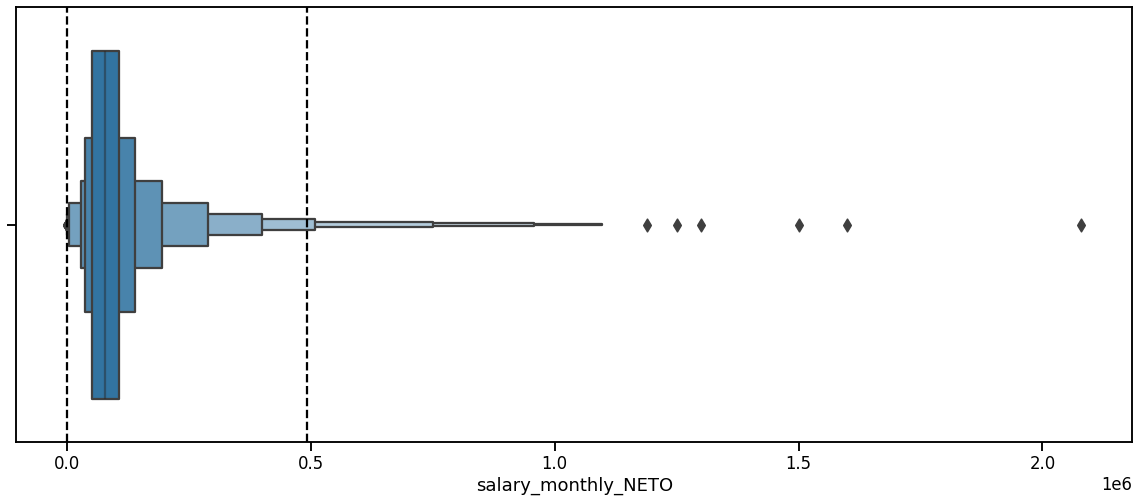

In [77]:
# Se define el percentil k para el filtrado y se definen los límites inferior y superior a partir de ese percentil
k = 99
limite_max = round(tp_df['salary_monthly_NETO'].quantile(k / 100),2)
limite_min = round(tp_df['salary_monthly_NETO'].quantile((100-k)/100),2)
median = round(tp_df['salary_monthly_NETO'].median(),2)
mean = round(tp_df['salary_monthly_NETO'].mean(),2)

print(f'El percentile {k} de la columna salary_monthly_NETO es ${limite_max}')
print(f'El percentile {100 - k} de la columna salary_montly_NETO es ${limite_min}')
print(f'La mediana de la columna salary_montly_NETO es ${median}, mientras que el promedio es de ${mean}')

plt.figure(figsize = (20,8))
seaborn.boxenplot(x=tp_df['salary_monthly_NETO'])
plt.axvline(limite_max, c = 'black', linestyle = 'dashed')
plt.axvline(limite_min, c = 'black', linestyle = 'dashed')
plt.show()

In [78]:
# Comenzamos filtrando sobre el dataframe original tp_df, basados en los limites inferior y superior.
# Para ello se copia a un nuevo dataframe sobre el cual se hará la limpieza de datos inconsistentes

salary_filtered_df = tp_df[tp_df['salary_monthly_NETO'] < limite_max] 
salary_filtered_df = salary_filtered_df[salary_filtered_df['salary_monthly_NETO'] > limite_min].sort_values('salary_monthly_NETO')
 
salary_filtered_df

,profile_gender,profile_age,work_country,work_province,profile_years_experience,work_years_in_company,profile_studies_level,profile_studies_level_state,profile_career,work_role,tools_platform,tools_programming_languages,tools_frameworks,salary_monthly_BRUTO,salary_monthly_NETO,salary_in_usd,company_employee_number,company_main_activity
2231,Mujer,25,Argentina,Ciudad Autónoma de Buenos Aires,0.0,0.0,Universitario,En curso,Diseño de Imágen y Sonido,Developer,Ninguna de las anteriores,"Go, Java, SQL",Spring,67.00,54.0,NaN,10001+,Producto basado en Software
2966,Hombre,28,Argentina,Ciudad Autónoma de Buenos Aires,3.0,1.0,Universitario,Completado,Licenciatura en Administración,Business Analyst,"POSTGRESQL, tableau, Qv","Python, SQL",Ninguno de los anteriores,67.25,55.0,NaN,51-100,Otras industrias
4061,Hombre,42,Argentina,Ciudad Autónoma de Buenos Aires,20.0,18.0,Terciario,Completado,Profesor de Informática,Developer,Windows Server,".NET, SQL, VB6",Ninguno de los anteriores,80.00,57.0,NaN,11-50,Producto basado en Software
5327,Hombre,28,Argentina,Ciudad Autónoma de Buenos Aires,15.0,2.0,Secundario,Completado,Tecnicatura Electrónica,SysAdmin / DevOps / SRE,"Amazon Web Services, Azure, SAP, Windows Server","HTML, SQL","Angular, Drupal, SAP",71760.00,58.0,NaN,11-50,Otras industrias
407,Hombre,30,Argentina,Ciudad Autónoma de Buenos Aires,8.0,1.0,Secundario,Incompleto,NaN,Developer,"Docker, Linux","CSS, HTML, Javascript, TypeScript","Node.js, React.js",74.00,58.0,NaN,11-50,Producto basado en Software
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3979,Hombre,37,Argentina,Ciudad Autónoma de Buenos Aires,16.0,0.0,Universitario,Completado,Ingeniería en Sistemas de Información,Developer,"Docker, Heroku",Ruby,Rails,870000.00,480000.0,Mi sueldo está dolarizado,51-100,Producto basado en Software
5878,Hombre,54,Argentina,Ciudad Autónoma de Buenos Aires,36.0,34.0,Posgrado,Completado,Ingeniería en Sistemas de Información,Manager / Director,"Amazon Web Services, Azure, Docker, IBM Cloud ...",".NET, C#, COBOL, HTML, Java, Ruby, SQL",".NET Core, Angular, Bootstrap, Cordova, Hibernate",750000.00,480000.0,NaN,10001+,Otras industrias
789,Hombre,33,Argentina,Ciudad Autónoma de Buenos Aires,10.0,0.0,Universitario,Completado,Ingeniería en Informática,SysAdmin / DevOps / SRE,"Kubernetes, Linux, Azure","Bash/Shell, Javascript, Python, Terraform HCL","Node.js, React.js",540000.00,480000.0,Mi sueldo está dolarizado,101-200,Servicios / Consultoría de Software / Digital
4193,Hombre,40,Argentina,Provincia de Buenos Aires,15.0,0.5,Universitario,Completado,Licenciatura en Informática,Developer,"Azure, Docker, Linux",".NET, Java, Python",Ninguno de los anteriores,500000.00,490000.0,Mi sueldo está dolarizado,51-100,Servicios / Consultoría de Software / Digital


Filtrando solamente con el percentil deja valores de salario muy bajos, por lo que seteamos un diferente valor de corte inferior, tomando como mínimo un salario de $ 10.000

In [79]:
# Se filtra según el nuevo valor de corte inferior
salary_filtered_df = salary_filtered_df[salary_filtered_df['salary_monthly_NETO'] > 10000]

salary_filtered_df

,profile_gender,profile_age,work_country,work_province,profile_years_experience,work_years_in_company,profile_studies_level,profile_studies_level_state,profile_career,work_role,tools_platform,tools_programming_languages,tools_frameworks,salary_monthly_BRUTO,salary_monthly_NETO,salary_in_usd,company_employee_number,company_main_activity
5638,Hombre,37,Argentina,Córdoba,4.0,0.0,Doctorado,Completado,Licenciatura en Ciencias dela Computación,Data Scientist / Data Engineer,"Docker, Linux",Python,"Django, Flask",109000.0,10700.0,NaN,11-50,Producto basado en Software
5854,Hombre,35,Argentina,Ciudad Autónoma de Buenos Aires,10.0,0.0,Posgrado,Completado,Licenciatura en Ciencias dela Computación,Scrum Master,"Docker, IBM Cloud / Watson, SAP, Windows Server",".NET, C#, COBOL, Java, Javascript",".NET Core, Bootstrap, jQuery, Node.js, SwiftUI",140000.0,11000.0,NaN,501-1000,Otras industrias
2735,Hombre,34,Argentina,Provincia de Buenos Aires,10.0,4.0,Universitario,Incompleto,Ingeniería en Sistemas de Información,Infosec,Ninguna de las anteriores,Ninguno de los anteriores,Ninguno de los anteriores,160000.0,11300.0,NaN,501-1000,Servicios / Consultoría de Software / Digital
5502,Hombre,26,Argentina,Ciudad Autónoma de Buenos Aires,4.0,4.0,Universitario,En curso,Licenciatura en Sistemas de Información,Manager / Director,"Docker, Heroku",".NET, C#",.NET Core,170000.0,12000.0,NaN,201-500,Servicios / Consultoría de Software / Digital
1814,Hombre,30,Argentina,Tucumán,1.0,1.0,Universitario,Incompleto,Ingeniería en Sistemas de Información,BI Analyst / Data Analyst,"Ninguna, VMWare","C++, Java, SQL",WordPress,15000.0,12000.0,NaN,1-10,Servicios / Consultoría de Software / Digital
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3979,Hombre,37,Argentina,Ciudad Autónoma de Buenos Aires,16.0,0.0,Universitario,Completado,Ingeniería en Sistemas de Información,Developer,"Docker, Heroku",Ruby,Rails,870000.0,480000.0,Mi sueldo está dolarizado,51-100,Producto basado en Software
5878,Hombre,54,Argentina,Ciudad Autónoma de Buenos Aires,36.0,34.0,Posgrado,Completado,Ingeniería en Sistemas de Información,Manager / Director,"Amazon Web Services, Azure, Docker, IBM Cloud ...",".NET, C#, COBOL, HTML, Java, Ruby, SQL",".NET Core, Angular, Bootstrap, Cordova, Hibernate",750000.0,480000.0,NaN,10001+,Otras industrias
789,Hombre,33,Argentina,Ciudad Autónoma de Buenos Aires,10.0,0.0,Universitario,Completado,Ingeniería en Informática,SysAdmin / DevOps / SRE,"Kubernetes, Linux, Azure","Bash/Shell, Javascript, Python, Terraform HCL","Node.js, React.js",540000.0,480000.0,Mi sueldo está dolarizado,101-200,Servicios / Consultoría de Software / Digital
4193,Hombre,40,Argentina,Provincia de Buenos Aires,15.0,0.5,Universitario,Completado,Licenciatura en Informática,Developer,"Azure, Docker, Linux",".NET, Java, Python",Ninguno de los anteriores,500000.0,490000.0,Mi sueldo está dolarizado,51-100,Servicios / Consultoría de Software / Digital


Se grafican ambas distribuciones de Salario antes y después de filtrar para poder comparar:

<Figure size 1440x576 with 0 Axes>

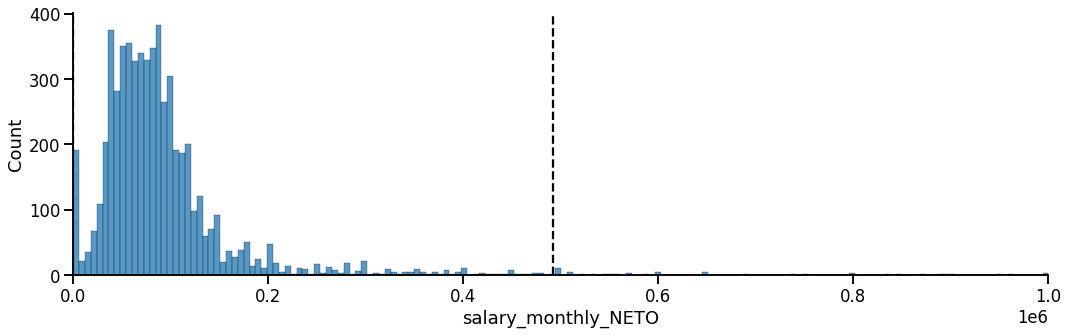

<Figure size 1440x576 with 0 Axes>

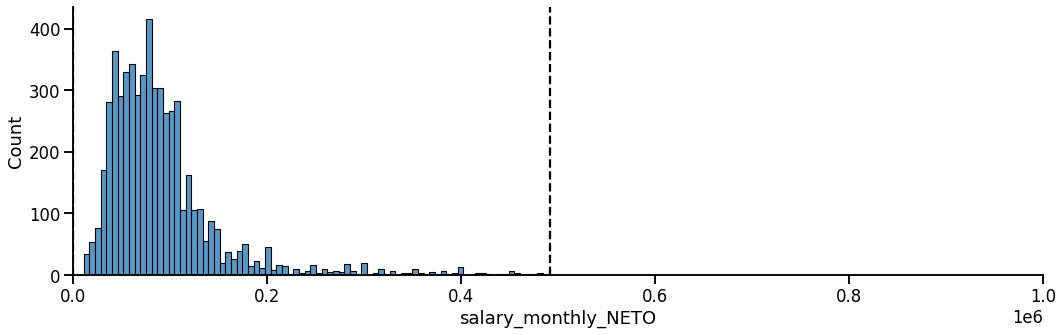

In [80]:
plt.figure(figsize = (20,8))
seaborn.displot(tp_df['salary_monthly_NETO'], aspect = 3)
plt.xlim(0,1e6)
plt.axvline(limite_max, c = 'black', linestyle = 'dashed')
plt.axvline(limite_min, c = 'black', linestyle = 'dashed')
plt.show()

plt.figure(figsize = (20,8))
seaborn.displot(salary_filtered_df['salary_monthly_NETO'], aspect = 3)
plt.xlim(0,1e6)
plt.axvline(limite_max, c = 'black', linestyle = 'dashed')
plt.axvline(limite_min, c = 'black', linestyle = 'dashed')
plt.show()

## a) Densidad conjunta

Que herramientas visuales y modelos puede utilizar para estudiar la distribución y comportamiento de sus datos? 

Elija tres variables numéricas y 2 variables categóricas. Visualice la base según varias de las variables elegidas. Puede describir de alguna forma el comportamiento de sus datos? Que herramientas utilizaría? Describa




Las variables numéricas seleccionadas son 'profile_age', 'profile_years_experience' y 'salary_monthly_NETO', mientras que las categóricas son 'profile_studies_level' y 'work_province'. Adicionalmente, se elije la variable 'salary_monthly_BRUTO' para poder estudiar luego la correlación que existe entre esta variable y 'salary_monthly_NETO'.

Para estudiar el dataset y entender la información con la que estamos trabajando, utilizamos como estrategia explorar los datos con un conjunto reducido de variables y verificar como se distribuyen los datos a través del  filtrado y agrupación a través de dichas variables

In [81]:
# Se seleccionan 3 variables numéricas y 2 categóricas que entendemos, son las más relevantes para el estudio del dataset
selected_fields = ['profile_age', 'profile_studies_level', 'work_province', 'profile_years_experience', 'salary_monthly_NETO', 'salary_monthly_BRUTO']
selected_fields_df = salary_filtered_df[selected_fields]
selected_fields_df

,profile_age,profile_studies_level,work_province,profile_years_experience,salary_monthly_NETO,salary_monthly_BRUTO
5638,37,Doctorado,Córdoba,4.0,10700.0,109000.0
5854,35,Posgrado,Ciudad Autónoma de Buenos Aires,10.0,11000.0,140000.0
2735,34,Universitario,Provincia de Buenos Aires,10.0,11300.0,160000.0
5502,26,Universitario,Ciudad Autónoma de Buenos Aires,4.0,12000.0,170000.0
1814,30,Universitario,Tucumán,1.0,12000.0,15000.0
...,...,...,...,...,...,...
3979,37,Universitario,Ciudad Autónoma de Buenos Aires,16.0,480000.0,870000.0
5878,54,Posgrado,Ciudad Autónoma de Buenos Aires,36.0,480000.0,750000.0
789,33,Universitario,Ciudad Autónoma de Buenos Aires,10.0,480000.0,540000.0
4193,40,Universitario,Provincia de Buenos Aires,15.0,490000.0,500000.0


#### Limpieza del Campo Provincia

En el caso de las provincias, se toma como criterio el pareto para agrupar las provincias mas representativas y que tengan volumen suficiente para obtener informacion relevante y agrupando al resto bajo el concepto "Resto"

In [82]:
aux_df = selected_fields_df.copy()

# Para comenzar, mapeamos "GBA" y "Provincia de Buenos Aires" como "Buenos Aires" y "Ciudad Autónoma de Buenos Aires" como "CABA"
aux_df.loc[aux_df['work_province'].isin(['GBA','Provincia de Buenos Aires']), 'work_province'] = 'Buenos Aires'
aux_df.loc[aux_df['work_province'] == 'Ciudad Autónoma de Buenos Aires', 'work_province'] = 'CABA'

# Comprobar que cambie la tabla de frecuencias:
#selected_fields_df['work_province'].value_counts() 
#aux_df['work_province'].value_counts()

# Pareto
top_provinces = aux_df[['work_province']].value_counts().rename_axis('province').reset_index(name='counts')
top_provinces['percentage'] = top_provinces['counts'] / sum(top_provinces['counts']) * 100
top_provinces['acum'] = top_provinces['percentage'].cumsum()
filtered_provinces = top_provinces[top_provinces['acum'] <= 95]['province']

provinces_filtered_df = aux_df.copy()
provinces_filtered_df.loc[~provinces_filtered_df['work_province'].isin(filtered_provinces),'work_province'] = 'Resto'

# Verificar nueva tabla de frecuencias
#provinces_filtered_df['work_province'].value_counts(True)*100

provinces_filtered_df

,profile_age,profile_studies_level,work_province,profile_years_experience,salary_monthly_NETO,salary_monthly_BRUTO
5638,37,Doctorado,Córdoba,4.0,10700.0,109000.0
5854,35,Posgrado,CABA,10.0,11000.0,140000.0
2735,34,Universitario,Buenos Aires,10.0,11300.0,160000.0
5502,26,Universitario,CABA,4.0,12000.0,170000.0
1814,30,Universitario,Resto,1.0,12000.0,15000.0
...,...,...,...,...,...,...
3979,37,Universitario,CABA,16.0,480000.0,870000.0
5878,54,Posgrado,CABA,36.0,480000.0,750000.0
789,33,Universitario,CABA,10.0,480000.0,540000.0
4193,40,Universitario,Buenos Aires,15.0,490000.0,500000.0


#### Limpieza del Campo Edad

Existen valores de Edad inconsistentes también, por lo que aplica un corte en la cota superior de 65 años, que es la edad jubilatoria.




In [83]:
# Se genera un nuevo dataframe
age_filtered_df = provinces_filtered_df.copy()

# Se ordena el dataframe por edad para facilitar la visualización de los outliers
#print(age_filtered_df.profile_age.sort_values())

age_filtered_df=age_filtered_df[age_filtered_df.profile_age <= 65].sort_values('profile_age')

age_filtered_df

,profile_age,profile_studies_level,work_province,profile_years_experience,salary_monthly_NETO,salary_monthly_BRUTO
1167,18,Secundario,CABA,0.0,63000.0,75800.0
5951,19,Universitario,Buenos Aires,1.0,20000.0,30000.0
5920,19,Secundario,CABA,0.0,16475.0,20300.0
108,19,Universitario,CABA,1.0,49000.0,49000.0
3463,19,Universitario,CABA,1.0,68000.0,85000.0
...,...,...,...,...,...,...
4234,62,Universitario,CABA,43.0,80000.0,85000.0
4959,64,Universitario,Buenos Aires,44.0,97000.0,128000.0
4099,64,Doctorado,CABA,30.0,260000.0,320000.0
5691,64,Terciario,Buenos Aires,32.0,64000.0,80000.0


#### Limpieza del Campo Años de Experiencia

Existen también valores inconsistentes en los años de experiencia. Se procede a una nueva limpieza también sobre este campo. Para ello se eligen los datos donde los años de experiencia sean mayores a cero pero menores de 45.

In [84]:
# Se genera un nuevo dataframe para seguir manteniendo los anteriores 
experience_filtered_df = age_filtered_df.copy()

# Ordenando el df por el campo experiencia se pueden ver los valores incosistentes
#print(experience_filtered_df = experience_filtered_df.sort_values('profile_years_experience'))

# Se filtran por los valores extraños
experience_filtered_df = experience_filtered_df[experience_filtered_df.profile_years_experience <= 45]
experience_filtered_df = experience_filtered_df[experience_filtered_df.profile_years_experience > 0]

experience_filtered_df = experience_filtered_df.sort_values('profile_years_experience')

# Se convierte el campo profile_years_experience a valor entero para que se pueda visualizar mejor
experience_filtered_df['profile_years_experience'] = experience_filtered_df['profile_years_experience'].astype('int')

experience_filtered_df

,profile_age,profile_studies_level,work_province,profile_years_experience,salary_monthly_NETO,salary_monthly_BRUTO
5951,19,Universitario,Buenos Aires,1,20000.0,30000.0
408,33,Terciario,Córdoba,1,275000.0,320000.0
5282,24,Universitario,CABA,1,42000.0,50000.0
1407,24,Universitario,CABA,1,42000.0,53000.0
5653,24,Terciario,CABA,1,43000.0,51000.0
...,...,...,...,...,...,...
2606,54,Universitario,CABA,36,35000.0,35000.0
4091,55,Universitario,CABA,37,64000.0,71000.0
5970,57,Posgrado,CABA,38,183000.0,272000.0
4234,62,Universitario,CABA,43,80000.0,85000.0


### Visualizaciones

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


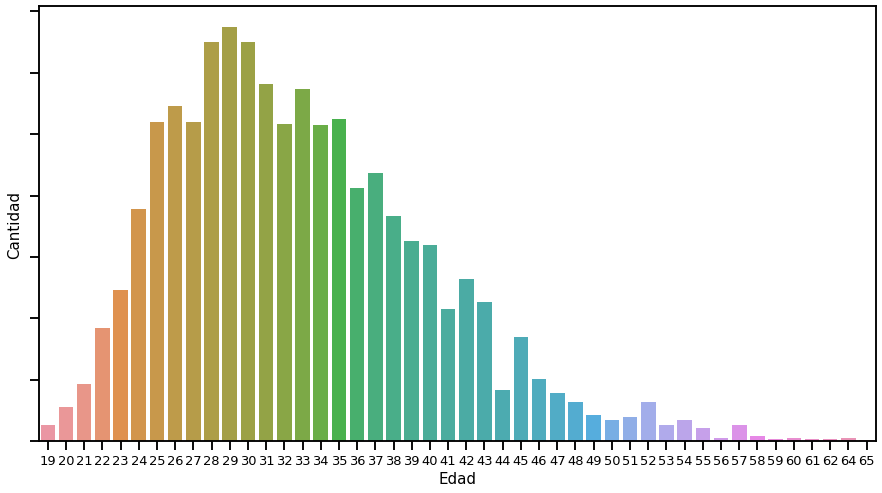

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


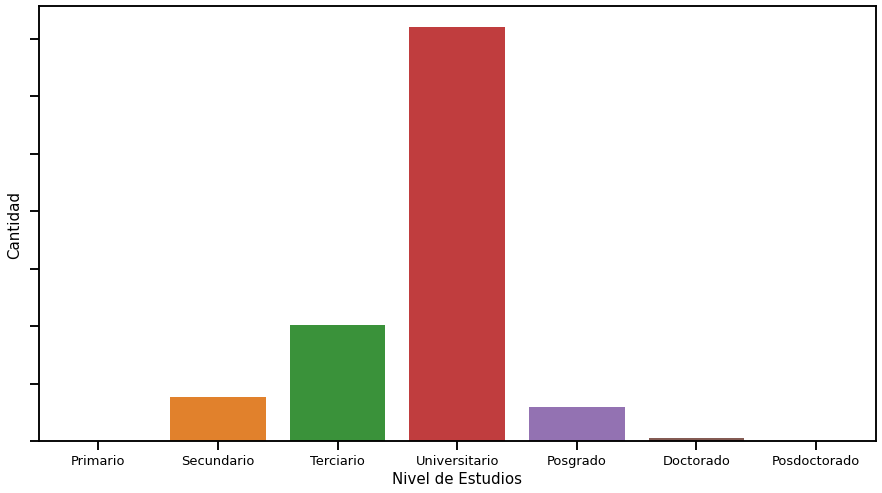

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


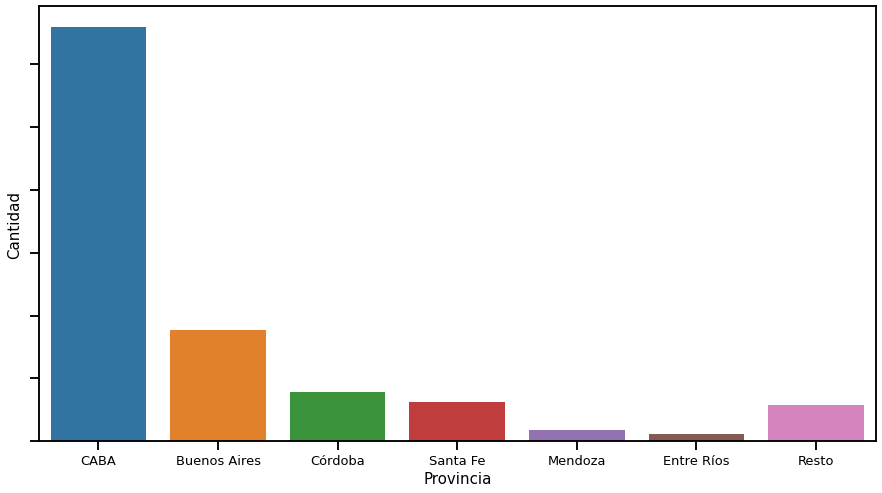

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


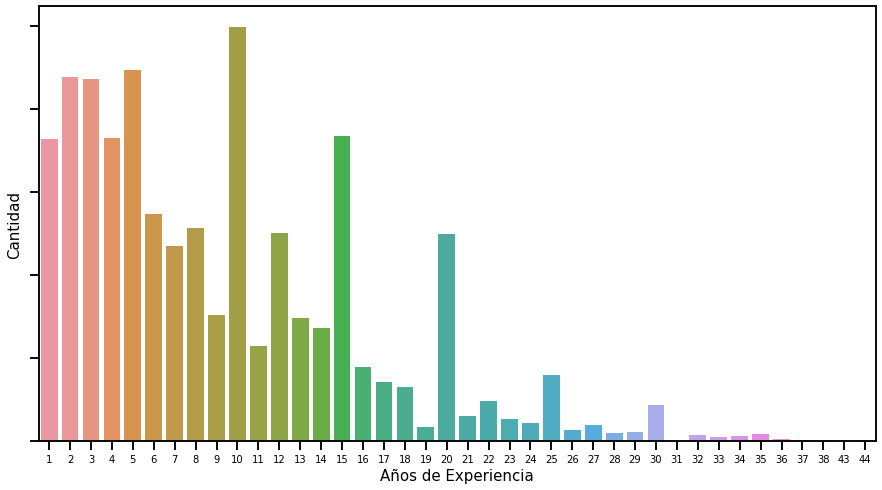

In [85]:
import seaborn as sns

### EDAD ###

fig = plt.figure(figsize = (15,8))
p = sns.countplot(experience_filtered_df['profile_age'],x='profile_age')
p.set_xlabel("Edad", fontsize = 15)
p.set_ylabel("Cantidad", fontsize = 15)
p.set_xticklabels(p.get_xticklabels(), size = 13)
p.set_yticklabels(p.get_yticklabels(), size = 15)
plt.show()

### ESTUDIOS ###

sorted_studies_levels = ['Primario', 'Secundario', 'Terciario', 'Universitario', 'Posgrado', 'Doctorado', 'Posdoctorado']
fig = plt.figure(figsize = (15,8))
p = sns.countplot(experience_filtered_df['profile_studies_level'],x='profile_age',order=sorted_studies_levels)
p.set_xlabel("Nivel de Estudios", fontsize = 15)
p.set_ylabel("Cantidad", fontsize = 15)
p.set_xticklabels(p.get_xticklabels(), size = 13)
p.set_yticklabels(p.get_yticklabels(), size = 14)
plt.show()

### PROVINCIA ###

sorted_provinces = ['CABA', 'Buenos Aires', 'Córdoba', 'Santa Fe', 'Mendoza', 'Entre Ríos', 'Resto']
fig = plt.figure(figsize = (15,8))
p = sns.countplot(experience_filtered_df['work_province'],x='profile_age',order=sorted_provinces)
p.set_xlabel("Provincia", fontsize = 15)
p.set_ylabel("Cantidad", fontsize = 15)
p.set_xticklabels(p.get_xticklabels(), size = 13)
p.set_yticklabels(p.get_yticklabels(), size = 14)
plt.show()

### AÑOS DE EXPERIENCIA ###

fig = plt.figure(figsize = (15,8))
p = sns.countplot(experience_filtered_df['profile_years_experience'],x='profile_age')
p.set_xlabel("Años de Experiencia", fontsize = 15)
p.set_ylabel("Cantidad", fontsize = 15)
p.set_xticklabels(p.get_xticklabels(), size = 10)
p.set_yticklabels(p.get_yticklabels(), size = 14)
plt.show()

Visualice la base según varias de las variables elegidas. Puede describir de alguna forma el comportamiento de sus datos? Que herramientas utilizaría? Describa

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text major ticklabel objects>)

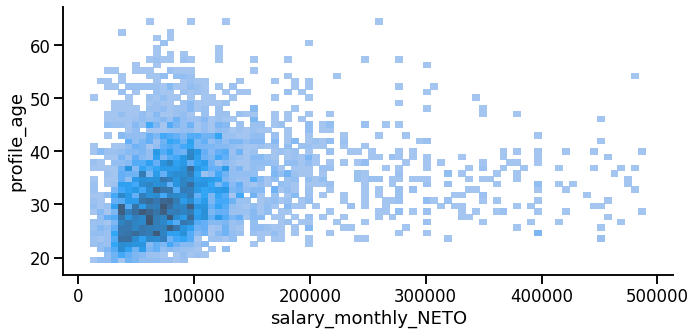

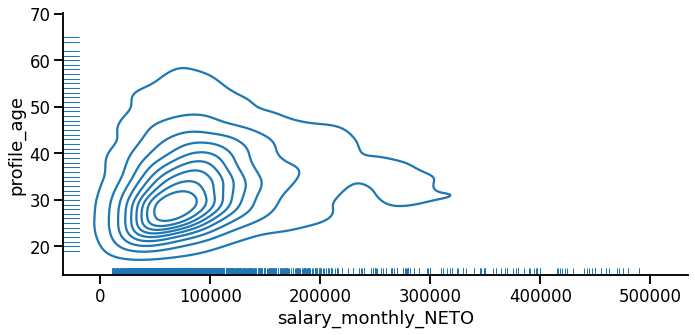

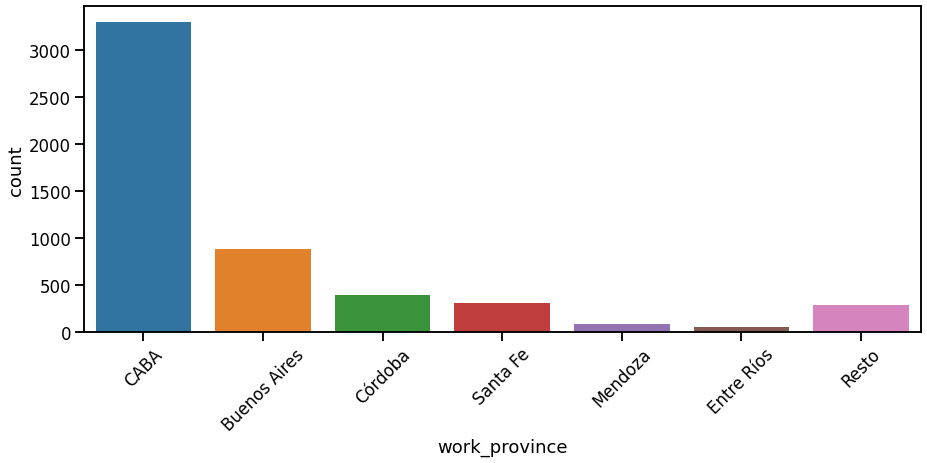

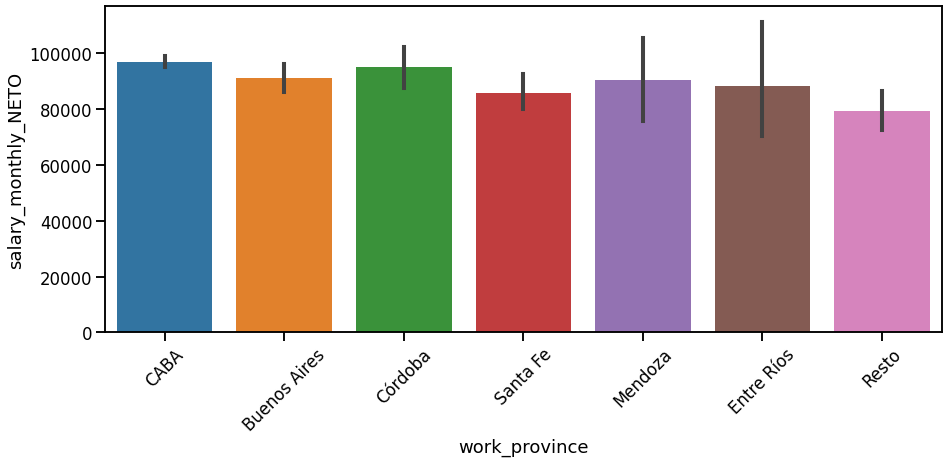

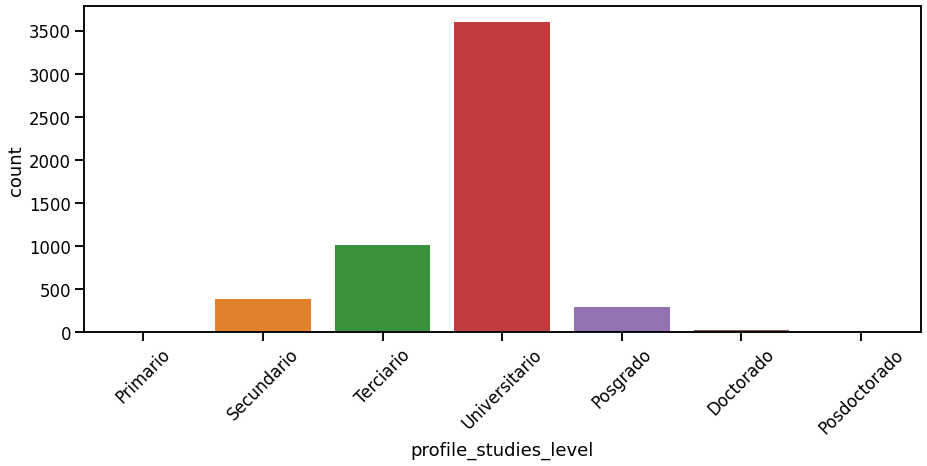

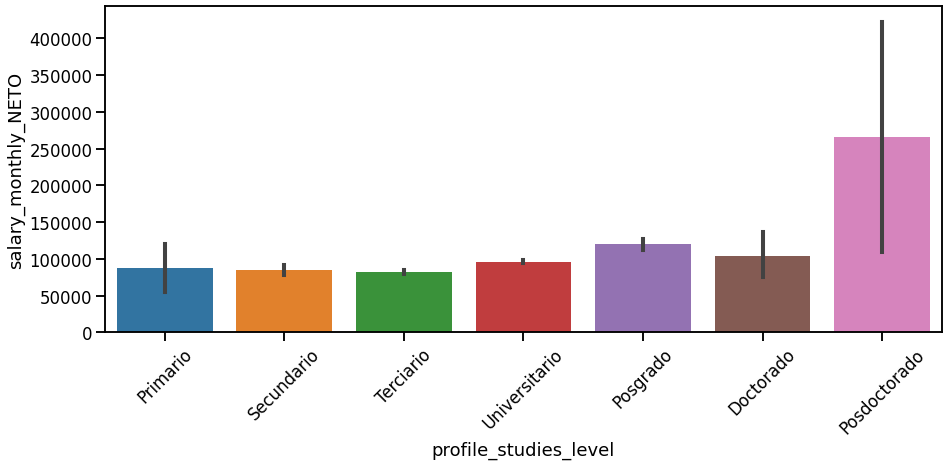

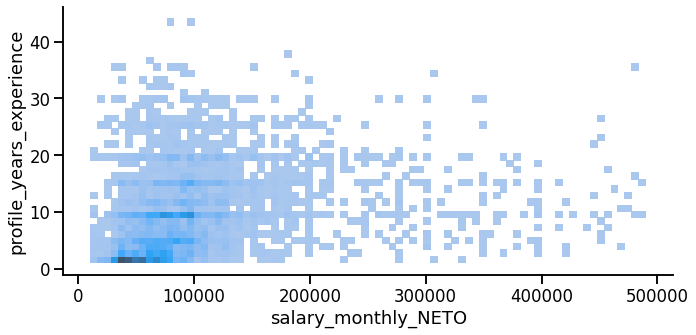

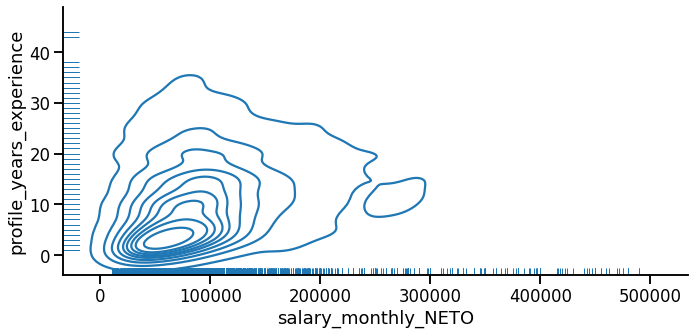

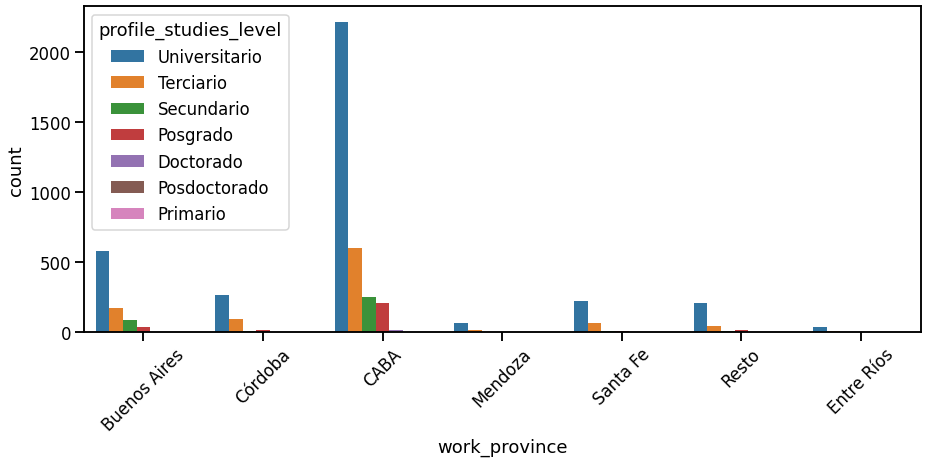

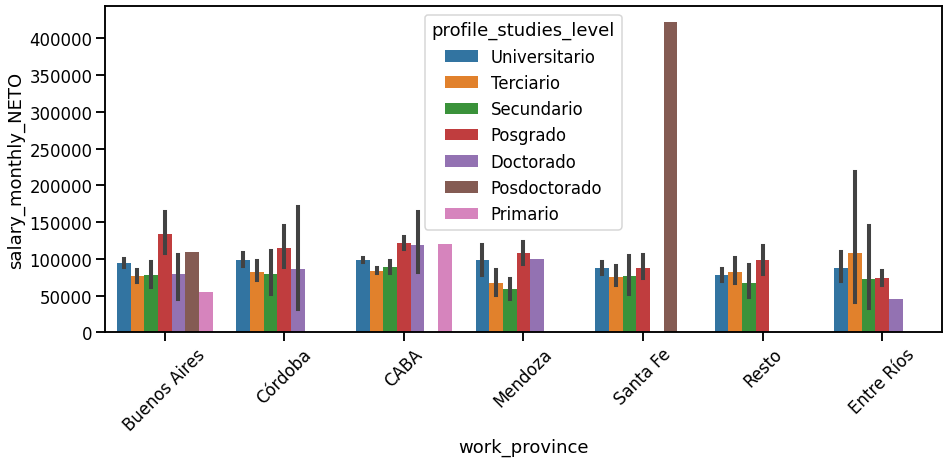

In [86]:
### SALARIO vs EDAD (dos numéricas) ###

sns.displot(data=experience_filtered_df, x="salary_monthly_NETO", y="profile_age", aspect=2)
sns.displot(data=experience_filtered_df, x="salary_monthly_NETO", y="profile_age", aspect=2, kind="kde", rug=True)

### SALARIO vs PROVINCIA ###

sorted_provinces = ['CABA', 'Buenos Aires', 'Córdoba', 'Santa Fe', 'Mendoza', 'Entre Ríos', 'Resto']

fig = plt.figure(figsize=(15,6))
sns.countplot(data=experience_filtered_df, x=experience_filtered_df['work_province'], order=sorted_provinces)
plt.xticks(rotation=45)

fig = plt.figure(figsize=(15,6))
sns.barplot(data=experience_filtered_df, y=experience_filtered_df['salary_monthly_NETO'], x=experience_filtered_df['work_province'], order=sorted_provinces)
plt.xticks(rotation=45)

### SALARIO vs NIVEL DE ESTUDIOS ###

sorted_studies_levels = ['Primario', 'Secundario', 'Terciario', 'Universitario', 'Posgrado', 'Doctorado', 'Posdoctorado']

fig = plt.figure(figsize=(15,6))
sns.countplot(data=experience_filtered_df, x=experience_filtered_df['profile_studies_level'], order=sorted_studies_levels)
plt.xticks(rotation=45)

fig = plt.figure(figsize=(15,6))
sns.barplot(data=experience_filtered_df, y=experience_filtered_df['salary_monthly_NETO'], x=experience_filtered_df['profile_studies_level'], order=sorted_studies_levels)
plt.xticks(rotation=45)

# SALARIO vs EXPERIENCIA

sns.displot(data=experience_filtered_df, x="salary_monthly_NETO", y="profile_years_experience", aspect=2)
sns.displot(data=experience_filtered_df, x="salary_monthly_NETO", y="profile_years_experience", aspect=2, kind="kde", rug=True)

# SALARIO vs PROVINCIA y NIVEL DE ESTUDIOS

fig = plt.figure(figsize=(15,6))
sns.countplot(data=experience_filtered_df, x=experience_filtered_df['work_province'],  hue=experience_filtered_df['profile_studies_level'])
plt.xticks(rotation=45)

fig = plt.figure(figsize=(15,6))
sns.barplot(data=experience_filtered_df, y=experience_filtered_df['salary_monthly_NETO'], x=experience_filtered_df['work_province'] ,hue=experience_filtered_df['profile_studies_level'])
plt.xticks(rotation=45)

**Observaciones**

Mediante la visualización cada variable seleccionada se pudo filtrar valores extraños o incosistentes individualmente. Luego de limpiar los datos, mediante la visutalización a través de la combinación de variables se pudo ver claramente la concentración de muestras para determinados segmentos en distintas variables. 

Se puede ver claramente que predominan individuos con estudios de nivel Terciario y Universitario, así como también predominantemente viviendo en CABA y Prov. Buenos Aires.

La distribución de salario parece ser relativamente uniforme por provincia, aunque si puede verse que a medida que la sub-población decrece, la dispersión comienza a ser mayor.

En los gráficos de variables numéricas combinadas, se puede ver que el rango etario también se concentra en torno a los 29~30 años y que el salario neto alrededor de $ 95000

Aparecen valores extraños para los niveles de estudio extremos que luego consideraremos aparte.

Las gráficas sugieren que para las sub-poblaciones de nivel de estudio relevantes en cantidad de observaciones, a medida que se invierte en formación, la media del salario neto promedio sube, aunque tal mejora no es tan evidente en el salto de Secundario a Terciario.

## b) Asociación

* Necesitamos decidir si sacar o no la columna de salario bruto. Para hacer la encuesta más simple.
¿Existe una correlación entre el salario bruto y el neto? Que abordaje y medidas usaría



### Limpieza del Campo Salario Bruto

Con el dataframe más consistente ahora se observa que hay valores de Salario Bruto que no parecen tener relación con el Salario Neto.
Para "limpiar" esta incosistencia se crea un nuevo campo en el Dataframe que compute esa relación


In [87]:
# Se crea un nuevo campo para evaluar el ratio entre el Salario Bruto y el Salario Neto
bruto_to_neto_ratio = salary_filtered_df.salary_monthly_BRUTO / tp_df.salary_monthly_NETO
salary_filtered_df.insert(len(salary_filtered_df.columns),column='bruto_to_neto_ratio',value = bruto_to_neto_ratio, allow_duplicates=True)

salary_filtered_df = salary_filtered_df[salary_filtered_df['bruto_to_neto_ratio'] < 3].sort_values('bruto_to_neto_ratio')
 
salary_filtered_df

,profile_gender,profile_age,work_country,work_province,profile_years_experience,work_years_in_company,profile_studies_level,profile_studies_level_state,profile_career,work_role,tools_platform,tools_programming_languages,tools_frameworks,salary_monthly_BRUTO,salary_monthly_NETO,salary_in_usd,company_employee_number,company_main_activity,bruto_to_neto_ratio
602,Hombre,30,Argentina,Córdoba,5.0,0.0,Universitario,Incompleto,Ingeniería en Sistemas de Información,Architect,"Amazon Web Services, Docker, Kubernetes","Bash/Shell, Python",Ninguno,2.00,237500.00,Mi sueldo está dolarizado,11-50,Servicios / Consultoría de Software / Digital,0.000008
5630,Hombre,31,Argentina,Ciudad Autónoma de Buenos Aires,5.0,8.0,Universitario,Completado,Tecnicatura Superior en Programación,Developer,Ninguna de las anteriores,"CSS, HTML, Javascript, TypeScript","Angular, Bootstrap, Node.js",1.00,80000.00,NaN,51-100,Producto basado en Software,0.000013
3329,Hombre,34,Argentina,Tierra del Fuego,13.0,13.0,Terciario,Incompleto,Analista de Sistemas,SysAdmin / DevOps / SRE,"Linux, Windows Server",Ninguno de los anteriores,WordPress,1.00,75800.00,NaN,11-50,Otras industrias,0.000013
1316,Mujer,25,Argentina,Ciudad Autónoma de Buenos Aires,5.0,1.5,Universitario,En curso,Diseño Gráfico,Designer,"Adobe illustrator, photoshop, after effects, i...",HTML,Bootstrap,1.00,14500.00,NaN,1-10,Otras industrias,0.000069
4386,Hombre,32,Argentina,Ciudad Autónoma de Buenos Aires,10.0,1.0,Secundario,Completado,NaN,Technical Leader,"Azure, Linux, Windows Server",".NET, Bash/Shell, C#, HTML, Javascript, Python...",".NET Core, Django, Unity3D",18.00,180000.00,NaN,1-10,Producto basado en Software,0.000100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,Mujer,37,Argentina,Ciudad Autónoma de Buenos Aires,12.0,0.0,Universitario,Completado,Licenciatura en Sistemas de Información,Developer,"Amazon Web Services, Docker, Kubernetes","Bash/Shell, Java, SQL","Hibernate, jQuery, Spring",157300.00,75000.00,NaN,501-1000,Producto basado en Software,2.097333
4829,Hombre,29,Argentina,Córdoba,5.0,2.0,Universitario,Incompleto,Licenciatura en Ciencias dela Computación,HelpDesk,"Amazon Web Services, Docker, VMWare, Windows S...","Bash/Shell, HTML, Javascript, PHP, Python, SQL...","Bootstrap, Django, jQuery, Node.js, WordPress,...",42000.00,20000.00,NaN,101-200,Otras industrias,2.100000
988,Hombre,35,Argentina,Ciudad Autónoma de Buenos Aires,13.0,6.0,Universitario,Completado,Ingeniería en Sistemas de Información,Sales / Pre-Sales,"Amazon Web Services, Docker, Kubernetes, Linux","Java, Javascript",React.js,220000.00,100000.00,NaN,201-500,Producto basado en Software,2.200000
858,Hombre,36,Argentina,Ciudad Autónoma de Buenos Aires,15.0,0.0,Universitario,Completado,Ingeniería en Informática,Developer,"Amazon Web Services, Docker, Linux",TypeScript,Ninguno,560000.00,250000.00,NaN,51-100,Otras industrias,2.240000


A continuación, se estudia si existe o no correlación entre las variables Salario Bruto y Salario Neto.

In [88]:
mini_df = experience_filtered_df[["salary_monthly_NETO","salary_monthly_BRUTO"]]
corrmat = mini_df.corr()
corrmat

,salary_monthly_NETO,salary_monthly_BRUTO
salary_monthly_NETO,1.000000,0.811439
salary_monthly_BRUTO,0.811439,1.000000


(array([0.5, 1.5]), <a list of 2 Text major ticklabel objects>)

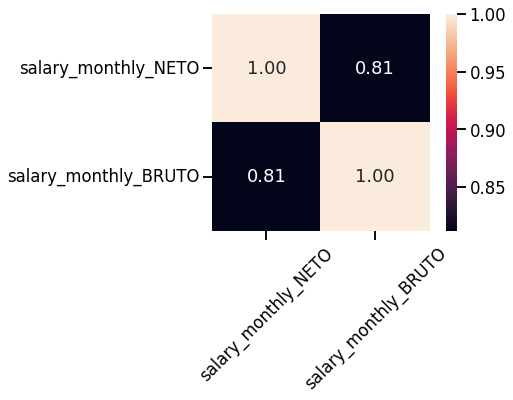

In [89]:
sns.heatmap(corrmat,cbar=True, annot=True, square=True, fmt='.2f')
plt.xticks(rotation=45)

Se concluye que existe una marcada correlación entre estas dos variables. Por esta razón, puede eliminarse la variable 'salary_monthly_Bruto' del dataframe.

In [90]:
experience_filtered_df = experience_filtered_df.drop('salary_monthly_BRUTO', axis = 1)

In [91]:
experience_filtered_df.columns

Index(['profile_age', 'profile_studies_level', 'work_province',
       'profile_years_experience', 'salary_monthly_NETO'],
      dtype='object')

### Selección de dos Sub-Poblaciones

## c) Densidad condicional 

Estudie la distribución del salario según el nivel de estudio.

Separe la población según el nivel de estudio (elija dos subpoblaciones numerosas) y grafique de manera comparativa ambos histogramas de la variable `'salary_monthly_NETO'`
¿Considera que ambas variables son independientes?
¿Qué analizaría al respecto?

Calcule medidas de centralización y dispersión para cada subpoblación






Comparando las distribuciones de la variable 'salary_monthly_NETO' según dos valores diferentes de 'profile_studies_level' (Universitario y Terciario) se observa que el la media del salario neto para 'Terciario' es menor que el de 'Universitario'.

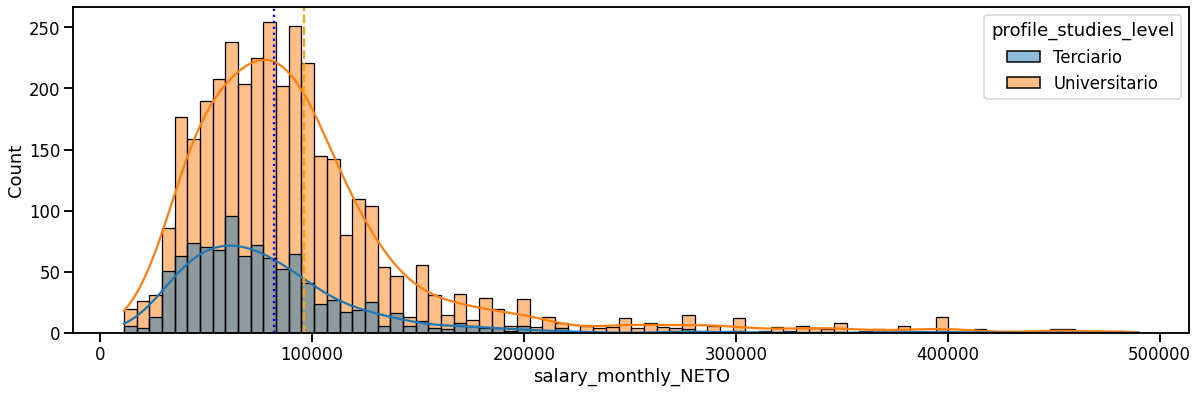

In [92]:
# Tomamos los 2 de Niveles de Estudio con mayor población
top2_study_level = experience_filtered_df['profile_studies_level'].value_counts().head(2).index
comparison_df = experience_filtered_df[experience_filtered_df['profile_studies_level'].isin(top2_study_level)]

# Histograma de Salario Neto V.S. Nivel de Estudios
fig = plt.figure(figsize=(20,6))
sns.histplot(x=comparison_df['salary_monthly_NETO'], hue=comparison_df['profile_studies_level'], hue_order=['Terciario','Universitario'], kde=True)
plt.axvline(comparison_df[comparison_df.profile_studies_level == 'Terciario']['salary_monthly_NETO'].mean(), color = 'blue', linestyle = 'dotted')
plt.axvline(comparison_df[comparison_df.profile_studies_level == 'Universitario']['salary_monthly_NETO'].mean(), color = 'orange', linestyle = 'dashed')

Pero por tratarse de poblaciones de diferentes tamaños, graficamos cada población normalizada y superpuestas, junto con los valores de las **medias**

La Media de la sub-población Universitaria es de $96088.0 mientras que de la sub-población Terciaria es $82030.0

Nota: El promedio general sin considerar el nivel de estudio es de $94009.0


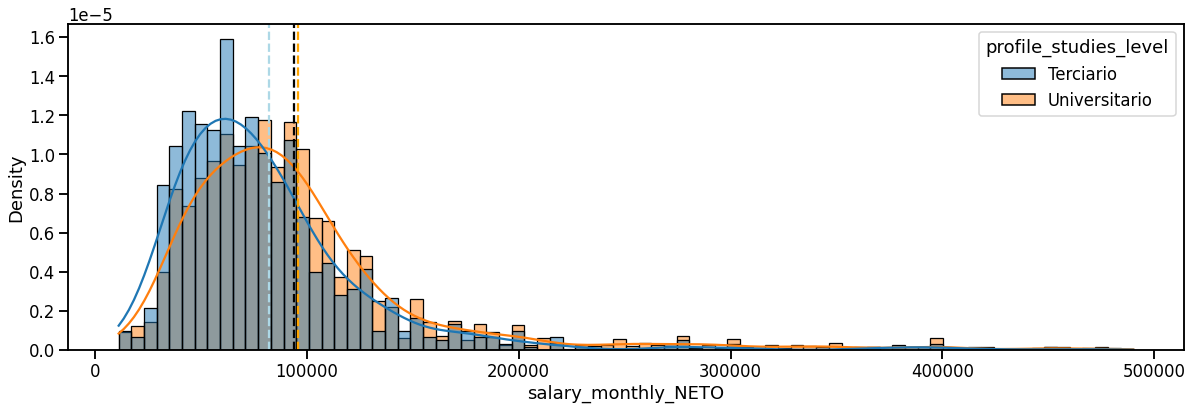

In [93]:
general_mean = round(experience_filtered_df['salary_monthly_NETO'].mean(),0)
segment1_mean = round(comparison_df['salary_monthly_NETO'][comparison_df['profile_studies_level']=='Universitario'].mean(),0)
segment2_mean = round(comparison_df['salary_monthly_NETO'][comparison_df['profile_studies_level']=='Terciario'].mean(),0)

fig = plt.figure(figsize=(20,6))
sns.histplot(x=comparison_df['salary_monthly_NETO'], \
             hue=comparison_df['profile_studies_level'], \
             hue_order=['Terciario','Universitario'], \
             kde=True, stat='density', \
             common_norm=False)
plt.axvline(segment1_mean, c = 'orange', linestyle = 'dashed')
plt.axvline(segment2_mean, c = 'lightblue', linestyle = 'dashed')
plt.axvline(general_mean, c = 'black', linestyle = 'dashed')

print(f'La Media de la sub-población Universitaria es de ${segment1_mean} mientras que de la sub-población Terciaria es ${segment2_mean}')
print(f'\nNota: El promedio general sin considerar el nivel de estudio es de ${general_mean}')


Se confirma que el pico de la distribución es un valor menor. Las distribuciones no pueden ser independientes porque no es lo mismo considerarlas o no considerarlas a la hora de estudiar el salario neto.

Para verlo más concretamente, tomaremos el valor de la media general, sin considerar el nivel de estudio, y veremos cómo la probabilidad de ganar más que la media no es independiente a la variable "nivel de estudio".

### Cálculo de Probabilidades Condicionales y Marginales

In [94]:
# Se agrega un campo al dataframe para ver mejor en un crosstab estas probabilidades condicionales y marginales
salary_above_mean = comparison_df['salary_monthly_NETO'] > general_mean
comparison_df.insert(len(comparison_df.columns), column='salary_above_mean', value = salary_above_mean, allow_duplicates=True)

# Tabla cruzada de las dos poblaciones con la propabilidad relativa a cada población de ganar más que el promedio general
pd.crosstab(comparison_df.salary_above_mean, \
            df.profile_studies_level, \
            margins=True, \
            normalize='columns', \
            margins_name='Total', \
            rownames=['Salario > Promedio'])

profile_studies_level,Terciario,Universitario,Total
Salario > Promedio,,,
False,0.737624,0.612052,0.639558
True,0.262376,0.387948,0.360442


Aquí resulta más fácil visualizar que, mientras la **probabilidad general** de ganar más que la media es del órden del **36%**, para alguien con niveles de estudios **universitarios**, ese porcentaje asciende a prácticamente **39%**; Mientras que para un estudiante con nivel de estudios **terciarios**, la probabilidad desciende a un **26%**.

**En este último caso la diferencia es mucho más significativa.**

Finalmente se muestran datos de Centralización y Dispersión de ambas sub-poblaciones:

In [95]:
# Se construye un dataframe tomando como input el método describe() para cada sub-población
resumen = pd.DataFrame()
resumen['Terciario'] = comparison_df['salary_monthly_NETO'][comparison_df['profile_studies_level']=='Terciario'].describe()
resumen['Universitario'] = comparison_df['salary_monthly_NETO'][comparison_df['profile_studies_level']=='Universitario'].describe()

resumen

,Terciario,Universitario
count,1010.000000,3601.000000
mean,82029.923960,96087.931505
std,52043.843472,62551.737148
min,12000.000000,11300.000000
25%,50000.000000,59960.000000
50%,71000.000000,83000.000000
75%,95000.000000,110000.000000
max,475000.000000,490000.000000


## d) Densidad Conjunta condicional

Elija dos variables numéricas y una categórica. 
Estudie la dispersión (scatterplot) de las dos variables discriminando en color por la variable categórica (ayuda: hue en seaborn)


### Seleccción de Variables

Elegimos las variables Edad, Años de Experiencia y la variable categórica nivel de Estudios por dos motivos:

1.   El tipo de gráfico scatterplot considerando la variable salario no aporta mucha más información. Por esa razón, se grafica un scatterplot teniendo en cuenta las variables 'profile_age' y 'profile_years_experience', discriminando por 'profile_studies_level'. 

2.   La variable salario es la que más ha sido trabajada en el TP, por lo que buscaremos aportar otro tipo de enfoque adicional.





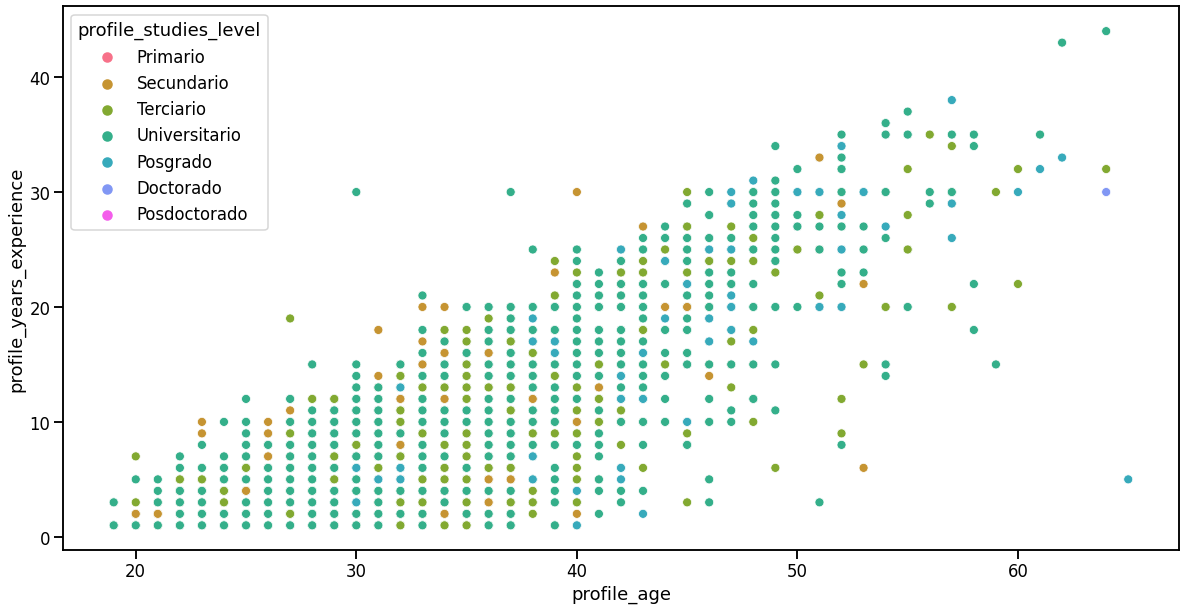

In [96]:
fig = plt.figure(figsize=(20,10))
sns.scatterplot(data=experience_filtered_df, \
                x='profile_age', \
                y='profile_years_experience', \
                hue='profile_studies_level', \
                hue_order=sorted_studies_levels, \
                palette='husl')

Puede observarse gráficamente que hay una distribución pareja dentro de la industria de perfiles de todos los niveles de estudio. 

Este gráfico no aporta información muy reveladora, pero si nos permite visualizar algunos datos "inválidos" que deberíamos limpiar para ganar en consistencia.

Por un lado eliminamos el/los registros con estudios "primarios", ya que lo consideramos falso. Por otro lado surge visualmente la incosistencia en los años de experiencia vs la edad de la persona. Para limpiar esto consideraremos que la diferencia entre ambos campos deberia ser siempre mayor a 18, asumiendo que la experiencia comienza con la edad de inicio laboral, que como mínimo es a los 18 años.

### Limpieza del Campo Años de Experiencia

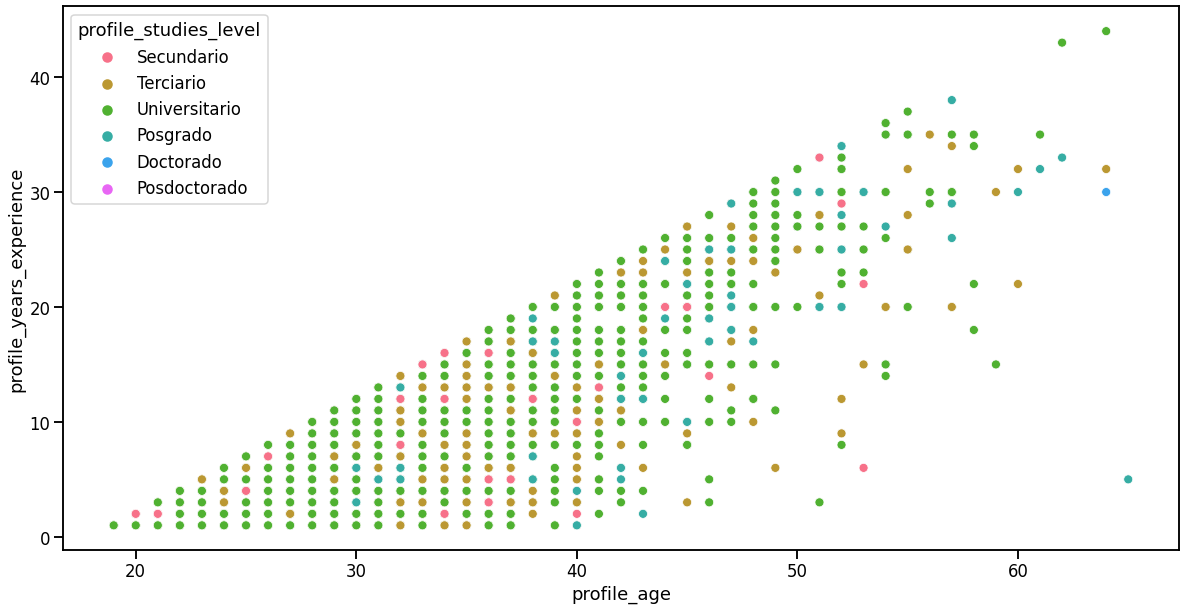

In [97]:
# Se eliminan los 2 registros con estudios primarios
studies_level_df = experience_filtered_df[~(experience_filtered_df.profile_studies_level == 'Primario')]

# Se eliminan los registros con inconsistencia entre los campos Edad y Años de Experiencia
studies_level_df = studies_level_df[~((studies_level_df.profile_age - studies_level_df.profile_years_experience) < 18)]

new_sorted_studies_levels = sorted_studies_levels = ['Secundario', 'Terciario', 'Universitario', 'Posgrado', 'Doctorado', 'Posdoctorado']

fig = plt.figure(figsize=(20,10))
sns.scatterplot(data=studies_level_df, \
                x='profile_age', \
                y='profile_years_experience', \
                hue='profile_studies_level', \
                hue_order=new_sorted_studies_levels, \
                palette='husl')